In [9]:
# 라이브러리 추가
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/KoPubDotumBold.ttf").get_name()
rc('font', family=font_name, size=20)

# 플롯 기본 설정
plt.rcParams["figure.figsize"] = (24,12) # 플롯 크기
plt.rcParams["lines.linewidth"] = True        # 선 두께
plt.rcParams["lines.color"] = 'r'        # 선 색상
plt.rcParams["axes.grid"] = True        # 격자 표시

In [10]:
# 엑셀파일 읽기
data = pd.read_excel('D:/GEODATA/bigkinds.xlsx', sheet_name='sheet', index_col='일자', parse_dates=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 982 entries, 2018-12-30 to 1995-09-23
Data columns (total 18 columns):
뉴스 식별자       982 non-null float64
언론사          982 non-null object
기고자          698 non-null object
제목           982 non-null object
통합 분류1       982 non-null object
통합 분류2       677 non-null object
통합 분류3       404 non-null object
사건/사고 분류1    40 non-null object
사건/사고 분류2    14 non-null object
사건/사고 분류3    1 non-null object
인물           471 non-null object
위치           957 non-null object
기관           935 non-null object
키워드          982 non-null object
특성추출         982 non-null object
본문           982 non-null object
URL          663 non-null object
분석제외 여부      138 non-null object
dtypes: float64(1), object(17)
memory usage: 145.8+ KB


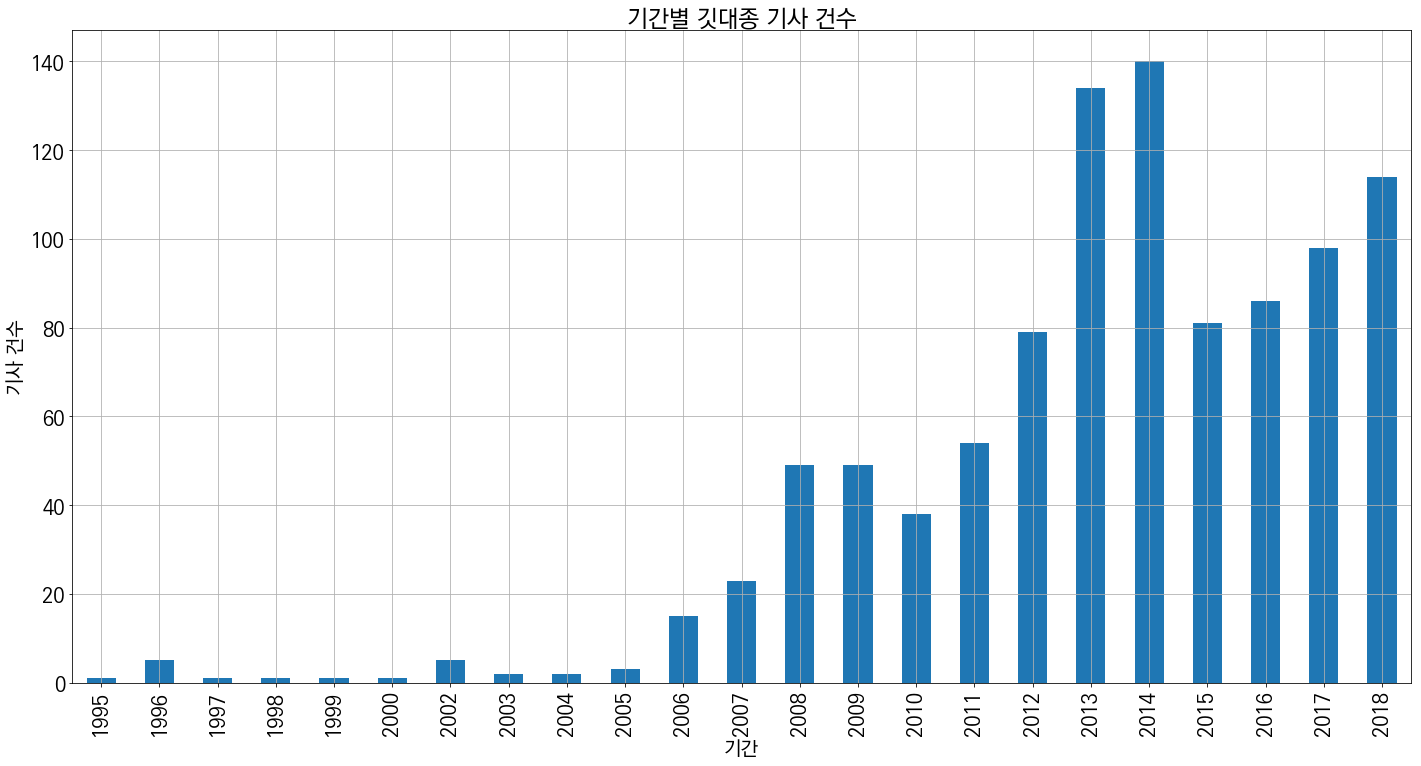

In [12]:
# 기간별 기사 건수
df1 = data.groupby(data.index.year).size()
df1.plot(kind='bar')
plt.xlabel('기간')
plt.ylabel('기사 건수')
plt.title('기간별 깃대종 기사 건수')
plt.savefig('D:/GEODATA/BIGKINDS1_IMG01.png', bbox_inches='tight')
plt.show()

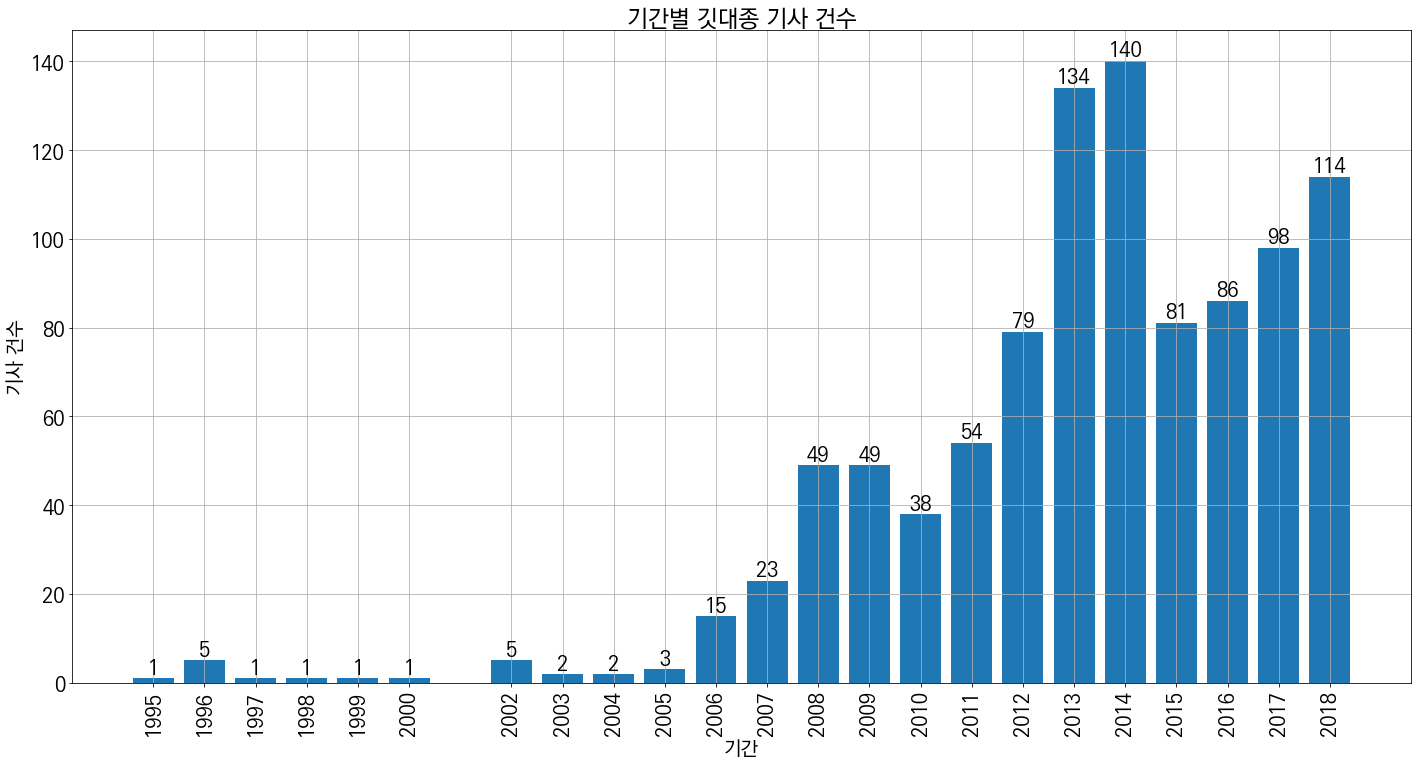

In [13]:
# 기간별 기사 건수
fig, ax = plt.subplots()
plt.xticks(df1.index, rotation=90)
plot = ax.bar(df1.index, df1.values)
              
# 라벨 추가
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., 1.002*height, '%d' %int(height), ha='center', va='bottom')
plt.xlabel('기간')
plt.ylabel('기사 건수')
plt.title('기간별 깃대종 기사 건수')
plt.savefig('D:/GEODATA/BIGKINDS1_IMG02.png', bbox_inches='tight')
plt.show()

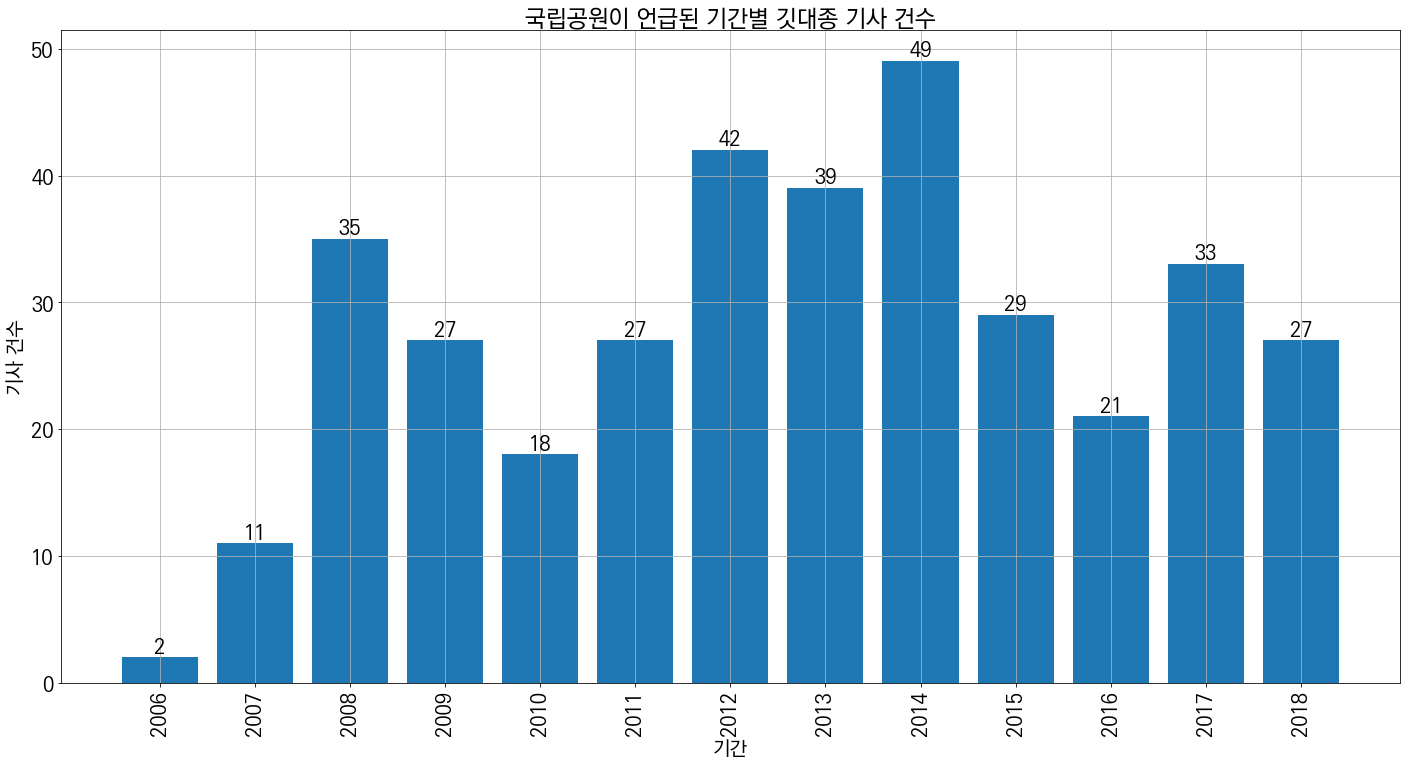

In [14]:
# '국립공원'이 언급된 기사 건수
df2 = data[data['제목'].str.contains('국립공원') | data['본문'].str.contains('국립공원')]
df2 = df2.groupby(df2.index.year).size()

# 기간별 기사 건수
fig, ax = plt.subplots()
plt.xticks(df2.index, rotation=90)
plot = ax.bar(df2.index, df2.values)
              
# 라벨 추가
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., 1.002*height, '%d' %int(height), ha='center', va='bottom')
plt.xlabel('기간')
plt.ylabel('기사 건수')
plt.title('국립공원이 언급된 기간별 깃대종 기사 건수')
plt.savefig('D:/GEODATA/BIGKINDS1_IMG03.png', bbox_inches='tight')
plt.show()

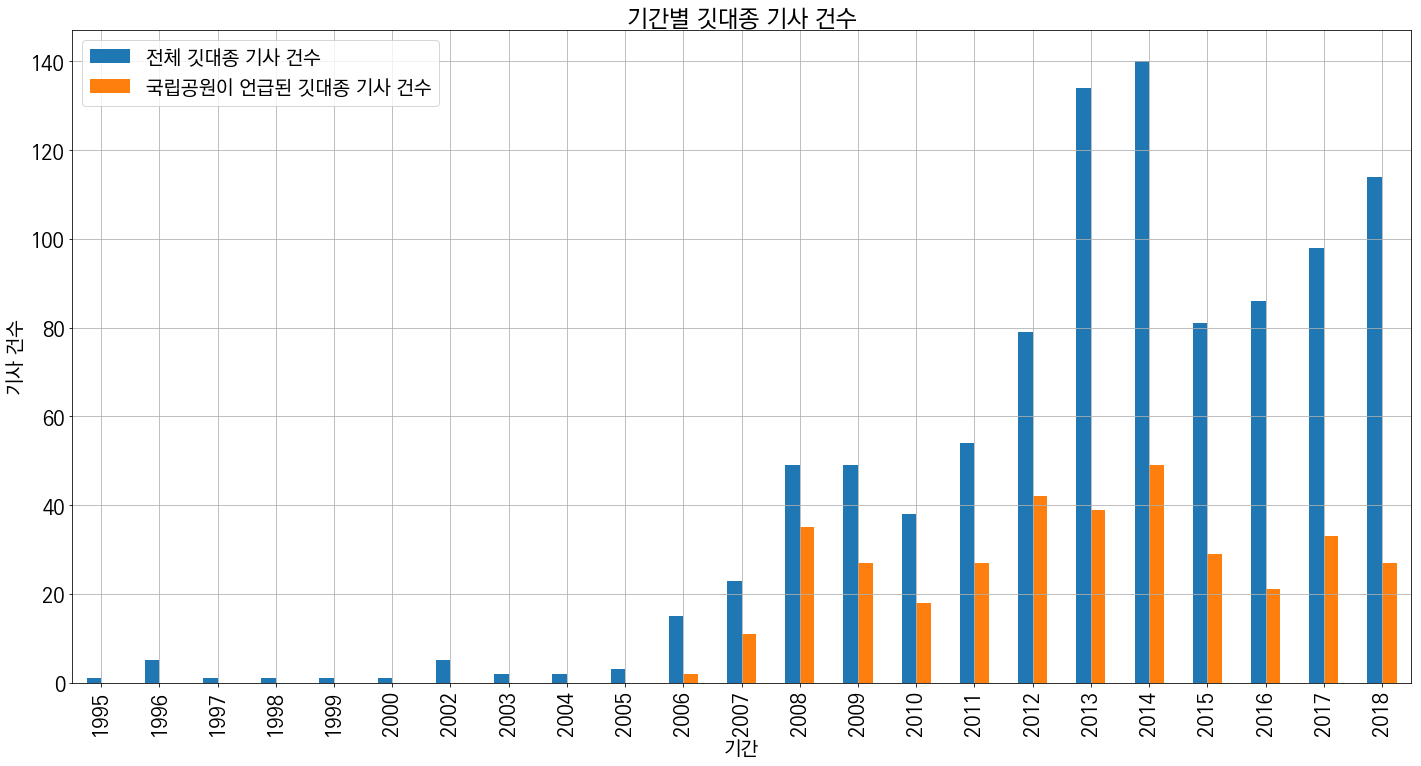

In [15]:
# 전체 깃대종과 국립공원이 언급된 깃대종 기사 건수
pd.concat([df1, df2], axis=1).plot(kind='bar')
plt.legend(["전체 깃대종 기사 건수", "국립공원이 언급된 깃대종 기사 건수"])
plt.xlabel('기간')
plt.ylabel('기사 건수')
plt.title('기간별 깃대종 기사 건수')
plt.savefig('D:/GEODATA/BIGKINDS1_IMG04.png', bbox_inches='tight')
plt.show()

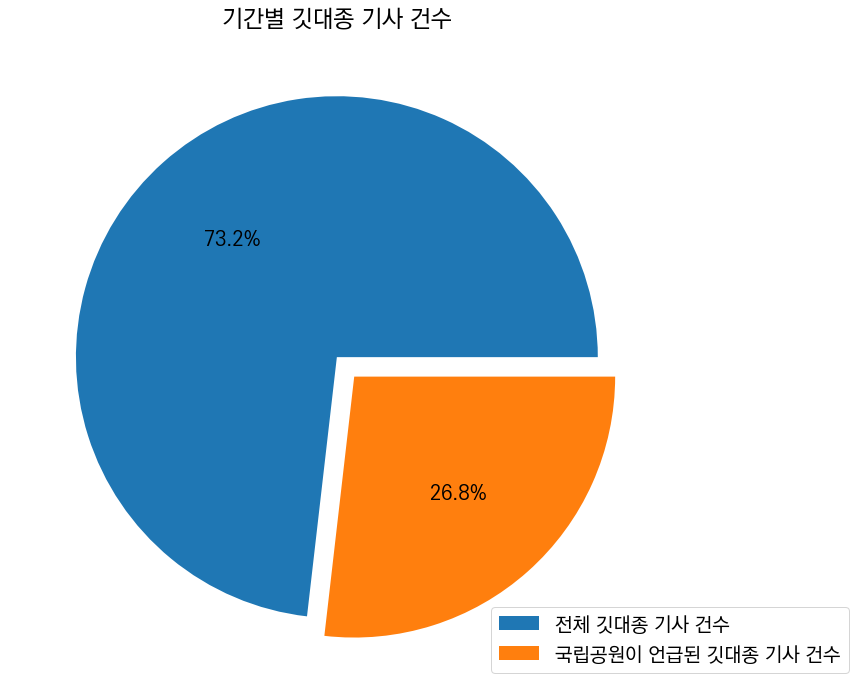

In [16]:
# 전체 깃대종 기사 중 국립공원이 언급된 기사의 비중
explode = (0, 0.1)
plt.pie(pd.concat([df1, df2], axis=1).sum(), explode=explode, autopct='%1.1f%%')
plt.title('기간별 깃대종 기사 건수')
plt.legend(["전체 깃대종 기사 건수", "국립공원이 언급된 깃대종 기사 건수"], loc='lower right', bbox_to_anchor=(1.3, 0))
plt.savefig('D:/GEODATA/BIGKINDS1_IMG05.png', bbox_inches='tight')
plt.show()